https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

In [1]:
# Library imports

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from IPython.display import clear_output 
import time

In [2]:
def life_or_death(address, board):
    # determines the next state of given cell (address) on a 
    #board (rectangular array of arrays)
    
    y,x = address
   
    if y > 0: 
        y1 = y-1
    else: 
        y1 = 0

    if y < len(board):
        y2 = y+1
    else: 
        y2 = y

    if  x > 0: 
        x1 = x-1
    else: 
        x1 = 0

    if x < len(board[0]):
        x2 = x+1
    else: 
        x2 = x

    env = board[y1:y2+1,x1:x2+1]

    if board[y,x] == 0:
        if env.sum() == 3:
            return True
        else:
            return False

    elif board[y,x] == 1:
        if env.sum() > 2 and env.sum() < 5:
            return True
        else:
            return False


In [3]:
def show_life(board, figsize, cmap):
    # displays a board (input), with display size (figsize),
    # and colour mapping (cmap) as inputs
    fig, ax = plt.subplots(figsize = (10,10))
    bounds = [0,0.5,1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax.set_xticks(ticks = np.arange(-.5, len(board[0]), 1));
    ax.set_yticks(np.arange(-.5, len(board), 1));
    ax.tick_params(labelbottom=False,labelleft=False) 
    ax.imshow(board, cmap=cmap, norm=norm)
    plt.show()

In [4]:
def insert_gliders(board, insertions_points):
    # inserts the below array into the board. This arrangement of life will 
    # propogate down and right across the display board

    glider =[[0,0,0,0,0],
             [0,0,0,1,0],
             [0,1,0,1,0],
             [0,0,1,1,0],
             [0,0,0,0,0]]

    for point in insertions_points:

        board[point[0]:(point[0]+len(glider)),point[1]:(point[1]+len(glider[0]))
        ] = glider

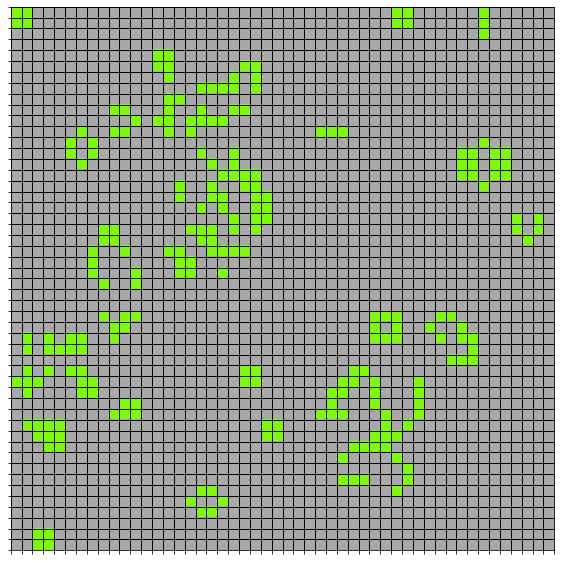

Epoch 100
Epoch limit reached


In [5]:

#colours for life/lifeless cells
life_colour = 'LawnGreen'
lifeless_colour = 'DarkGray'
cmap = colors.ListedColormap([lifeless_colour, life_colour])

# output figure size
figsize = (10,10)

#add sleep in seconds to pause between epochs
sleep = 0

# board size in cells
board_size = (50,50)

# specify life probability (0-1) for each cell
chance_of_life = 0.2

# maximum number of epochs (set limit_epochs = True to activate)
limit_epochs = True
max_epochs = 100

# isert glider objects (group of cells that moves down and right accross board)
# (set insert_gliders_on = True)
insert_gliders_on = True
glider_isertion_points = [(0,0),
                          (10,10),
                          (15,20)]

# game of life logic
board = (np.random.rand(board_size[0],board_size[1]) < chance_of_life)

if insert_gliders_on:
    insert_gliders(board, glider_isertion_points)

epoch = 1
while board.sum() != 0 and board.sum() != board.size:
    if limit_epochs == True and max_epochs < epoch:
        print('Epoch limit reached')
        break
    clear_output(wait=True)
    show_life(board, figsize, cmap)
    print(f'Epoch {epoch}')
    
    next_board = np.zeros(board_size)
    
    for y in range(board_size[0]):
        for x in range(board_size[1]):
            next_board[y,x] = life_or_death(address=(y,x), board = board)
    board = next_board
    
    if epoch == 1:
        time.sleep(3)

    if sleep > 0:
        time.sleep(sleep)
    epoch += 1